# Importamos bibliotecas necesarias

In [1]:
from sys import maxsize #para imprimir arrays completos
import numpy as np
import pandas as pd

from sklearn import preprocessing #para normalizar datos
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



# Leer el data set desde el archivo csv

In [2]:
pathArchivoDataSet = 'properatti_2.csv'
df = pd.read_csv(pathArchivoDataSet)

In [3]:
df.head(5)

,property_type,place_name,state_name,price,surface_covered_in_m2,surface_not_covered_in_m2,price_usd_per_m2,rooms,lat_mediaPorZona,lon_mediaPorZona,pileta,cochera,balcon,terraza,parrilla
0,PH,mataderos,Capital Federal,62000.0,40.000000,15.0,1127.272727,2.0,-34.666326,-58.519094,0,0,0,0,0
1,apartment,la plata,Bs.As. G.B.A. Zona Sur,150000.0,69.891566,0.0,2146.181693,3.0,-34.924277,-57.965973,0,1,1,0,0
2,apartment,mataderos,Capital Federal,72000.0,55.000000,0.0,1309.090909,2.0,-34.666326,-58.519094,0,0,0,0,0
3,PH,liniers,Capital Federal,95000.0,92.565511,0.0,1026.300175,3.0,-34.643508,-58.516984,0,0,0,0,0
4,apartment,centro,Buenos Aires Costa Atlántica,64000.0,35.000000,0.0,1828.571429,4.0,-38.000247,-57.547260,0,0,0,0,0


# Definimos el subset de datos del cual generaremos el modelo

### Nos quedamos con el subset de datos relacionados a Capital Federal

In [4]:
filtroParaElSubsetDeDatos = "Capital Federal"

In [5]:
df_subset = df[df['state_name'] == filtroParaElSubsetDeDatos]

In [6]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28666 entries, 0 to 109291
Data columns (total 15 columns):
property_type                28666 non-null object
place_name                   28666 non-null object
state_name                   28666 non-null object
price                        28666 non-null float64
surface_covered_in_m2        28666 non-null float64
surface_not_covered_in_m2    28666 non-null float64
price_usd_per_m2             28666 non-null float64
rooms                        28666 non-null float64
lat_mediaPorZona             28666 non-null float64
lon_mediaPorZona             28666 non-null float64
pileta                       28666 non-null int64
cochera                      28666 non-null int64
balcon                       28666 non-null int64
terraza                      28666 non-null int64
parrilla                     28666 non-null int64
dtypes: float64(7), int64(5), object(3)
memory usage: 3.5+ MB


In [7]:
df_subset.head(5)

,property_type,place_name,state_name,price,surface_covered_in_m2,surface_not_covered_in_m2,price_usd_per_m2,rooms,lat_mediaPorZona,lon_mediaPorZona,pileta,cochera,balcon,terraza,parrilla
0,PH,mataderos,Capital Federal,62000.0,40.000000,15.0,1127.272727,2.0,-34.666326,-58.519094,0,0,0,0,0
2,apartment,mataderos,Capital Federal,72000.0,55.000000,0.0,1309.090909,2.0,-34.666326,-58.519094,0,0,0,0,0
3,PH,liniers,Capital Federal,95000.0,92.565511,0.0,1026.300175,3.0,-34.643508,-58.516984,0,0,0,0,0
7,apartment,belgrano,Capital Federal,138000.0,40.000000,5.0,3066.666667,1.0,-34.563566,-58.453991,0,0,0,0,0
8,apartment,belgrano,Capital Federal,195000.0,60.000000,5.0,3000.000000,2.0,-34.563566,-58.453991,0,0,0,0,0


# Dropeamos la columna state_name, ya que todos los datos tiene el mismo valor

In [8]:
df_subset = df_subset.drop(labels='state_name', axis = 1)

# Analizamos las variables categóricas

palermo                2682
belgrano               2590
recoleta               2464
caballito              2054
villa urquiza          1358
flores                 1250
balvanera              1189
villa crespo           1176
almagro                1010
capital federal         964
san telmo               958
boedo                   835
nuñez                   687
san cristobal           594
puerto madero           568
san nicolás             494
saavedra                486
floresta                454
villa del parque        449
palermo hollywood       443
monserrat               416
mataderos               404
villa devoto            398
barracas                396
villa luro              396
liniers                 377
colegiales              327
parque patricios        313
palermo soho            300
retiro                  240
coghlan                 227
palermo chico           220
chacarita               205
constitución            199
villa lugano            184
boca                

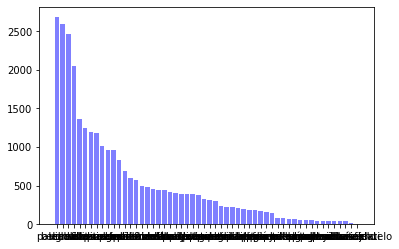

apartment    23656
house         2022
PH            1747
store         1241
Name: property_type, dtype: int64


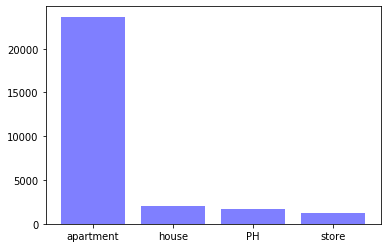

In [9]:
categories = ['place_name', 'property_type']

for category in categories:
    print(df_subset[category].value_counts())
    plt.bar(df_subset[category].value_counts().index, df_subset[category].value_counts().values, color='b',\
            alpha=0.5)
    plt.show()

### Creamos variables dummies a partir de la variable categorica

In [10]:
for category in categories:
    serie = df_subset[category]
    dummies = pd.get_dummies(serie, drop_first= True, prefix=category)
    df_subset = pd.concat([df_subset, dummies], axis=1)

df_subset.head()

,property_type,place_name,price,surface_covered_in_m2,surface_not_covered_in_m2,price_usd_per_m2,rooms,lat_mediaPorZona,lon_mediaPorZona,pileta,...,place_name_villa ortuzar,place_name_villa pueyrredón,place_name_villa real,place_name_villa riachuelo,place_name_villa santa rita,place_name_villa soldati,place_name_villa urquiza,property_type_apartment,property_type_house,property_type_store
0,PH,mataderos,62000.0,40.000000,15.0,1127.272727,2.0,-34.666326,-58.519094,0,...,0,0,0,0,0,0,0,0,0,0
2,apartment,mataderos,72000.0,55.000000,0.0,1309.090909,2.0,-34.666326,-58.519094,0,...,0,0,0,0,0,0,0,1,0,0
3,PH,liniers,95000.0,92.565511,0.0,1026.300175,3.0,-34.643508,-58.516984,0,...,0,0,0,0,0,0,0,0,0,0
7,apartment,belgrano,138000.0,40.000000,5.0,3066.666667,1.0,-34.563566,-58.453991,0,...,0,0,0,0,0,0,0,1,0,0
8,apartment,belgrano,195000.0,60.000000,5.0,3000.000000,2.0,-34.563566,-58.453991,0,...,0,0,0,0,0,0,0,1,0,0


# Guardamos un data frame auxiliar con la relacion entre los dummies y el dato place_name

### Data frame auxiliar para place name

In [11]:
filter_col = [col for col in df_subset if col.startswith('place_name')]
filter_col

['place_name',
 'place_name_almagro',
 'place_name_balvanera',
 'place_name_barracas',
 'place_name_belgrano',
 'place_name_boca',
 'place_name_boedo',
 'place_name_caballito',
 'place_name_capital federal',
 'place_name_chacarita',
 'place_name_coghlan',
 'place_name_colegiales',
 'place_name_constitución',
 'place_name_flores',
 'place_name_floresta',
 'place_name_liniers',
 'place_name_mataderos',
 'place_name_monserrat',
 'place_name_monte castro',
 'place_name_nueva pompeya',
 'place_name_nuñez',
 'place_name_palermo',
 'place_name_palermo chico',
 'place_name_palermo hollywood',
 'place_name_palermo soho',
 'place_name_palermo viejo',
 'place_name_parque avellaneda',
 'place_name_parque centenario',
 'place_name_parque chacabuco',
 'place_name_parque chas',
 'place_name_parque patricios',
 'place_name_paternal',
 'place_name_puerto madero',
 'place_name_recoleta',
 'place_name_retiro',
 'place_name_saavedra',
 'place_name_san cristobal',
 'place_name_san nicolás',
 'place_name_sa

In [12]:
place_name_dummies = df_subset[filter_col]
place_name_dummies = place_name_dummies.loc[:,~place_name_dummies.columns.duplicated()]
place_name_dummies = place_name_dummies.drop_duplicates()
place_name_dummies

,place_name,place_name_almagro,place_name_balvanera,place_name_barracas,place_name_belgrano,place_name_boca,place_name_boedo,place_name_caballito,place_name_capital federal,place_name_chacarita,...,place_name_villa general mitre,place_name_villa lugano,place_name_villa luro,place_name_villa ortuzar,place_name_villa pueyrredón,place_name_villa real,place_name_villa riachuelo,place_name_villa santa rita,place_name_villa soldati,place_name_villa urquiza
0,mataderos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,liniers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,belgrano,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,palermo soho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,palermo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,flores,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,boedo,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,puerto madero,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,balvanera,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,caballito,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data frame auxiliar para property_type

In [13]:
filter_col = [col for col in df_subset if col.startswith('property_type')]
filter_col

['property_type',
 'property_type_apartment',
 'property_type_house',
 'property_type_store']

In [14]:
proeprty_type_dummies = df_subset[filter_col]
proeprty_type_dummies = proeprty_type_dummies.loc[:,~proeprty_type_dummies.columns.duplicated()]
proeprty_type_dummies = proeprty_type_dummies.drop_duplicates()
proeprty_type_dummies

,property_type,property_type_apartment,property_type_house,property_type_store
0,PH,0,0,0
2,apartment,1,0,0
46,house,0,1,0
55,store,0,0,1


# Vemos que hay mucha diferencia entre las unidades del precio con la de la superficie y el precio por m2, normalizamos estos valores 

In [15]:
df_subset.head(5)

,property_type,place_name,price,surface_covered_in_m2,surface_not_covered_in_m2,price_usd_per_m2,rooms,lat_mediaPorZona,lon_mediaPorZona,pileta,...,place_name_villa ortuzar,place_name_villa pueyrredón,place_name_villa real,place_name_villa riachuelo,place_name_villa santa rita,place_name_villa soldati,place_name_villa urquiza,property_type_apartment,property_type_house,property_type_store
0,PH,mataderos,62000.0,40.000000,15.0,1127.272727,2.0,-34.666326,-58.519094,0,...,0,0,0,0,0,0,0,0,0,0
2,apartment,mataderos,72000.0,55.000000,0.0,1309.090909,2.0,-34.666326,-58.519094,0,...,0,0,0,0,0,0,0,1,0,0
3,PH,liniers,95000.0,92.565511,0.0,1026.300175,3.0,-34.643508,-58.516984,0,...,0,0,0,0,0,0,0,0,0,0
7,apartment,belgrano,138000.0,40.000000,5.0,3066.666667,1.0,-34.563566,-58.453991,0,...,0,0,0,0,0,0,0,1,0,0
8,apartment,belgrano,195000.0,60.000000,5.0,3000.000000,2.0,-34.563566,-58.453991,0,...,0,0,0,0,0,0,0,1,0,0


# Generamos el objeto para el K Fold

In [16]:
#generamos un K Fold de 5 pasos para el entrenamiento de los modelos
cv = KFold(5, shuffle=True, random_state=10)

# Generamos un modelo con Regresion Lineal

In [17]:
df_model_columns = df_subset.drop(labels= ["price", "property_type", "place_name"], axis=1)
df_model_columns

,surface_covered_in_m2,surface_not_covered_in_m2,price_usd_per_m2,rooms,lat_mediaPorZona,lon_mediaPorZona,pileta,cochera,balcon,terraza,...,place_name_villa ortuzar,place_name_villa pueyrredón,place_name_villa real,place_name_villa riachuelo,place_name_villa santa rita,place_name_villa soldati,place_name_villa urquiza,property_type_apartment,property_type_house,property_type_store
0,40.000000,15.0,1127.272727,2.0,-34.666326,-58.519094,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55.000000,0.0,1309.090909,2.0,-34.666326,-58.519094,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,92.565511,0.0,1026.300175,3.0,-34.643508,-58.516984,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,40.000000,5.0,3066.666667,1.0,-34.563566,-58.453991,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,60.000000,5.0,3000.000000,2.0,-34.563566,-58.453991,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109238,65.000000,26.0,1813.186813,4.0,-34.592516,-58.397354,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
109241,39.000000,5.0,3750.000000,1.0,-34.592516,-58.397354,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
109283,157.000000,0.0,999.044328,3.0,-34.563566,-58.453991,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
109289,93.000000,20.0,7699.115044,4.0,-34.563566,-58.453991,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
#definimos como variables para entrenamiento todas las del data frame excepto el precio por m2
#el valor precio por m2 será lo que el modelo intente calcular
X = df_model_columns.drop('price_usd_per_m2', axis=1)
y = df_model_columns['price_usd_per_m2']

In [19]:
#seleccionamos un tamaño para el set de test del 25% del data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [20]:
regresionLineal = LinearRegression()

### Normalizamos los valores de X

##### Usando sklearn L1

In [21]:
X_train.head(1)

,surface_covered_in_m2,surface_not_covered_in_m2,rooms,lat_mediaPorZona,lon_mediaPorZona,pileta,cochera,balcon,terraza,parrilla,...,place_name_villa ortuzar,place_name_villa pueyrredón,place_name_villa real,place_name_villa riachuelo,place_name_villa santa rita,place_name_villa soldati,place_name_villa urquiza,property_type_apartment,property_type_house,property_type_store
101095,110.0,27.431323,4.0,-34.551392,-58.483124,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
X_train_norm_l1 = preprocessing.normalize(X_train, norm='l1', axis=0)

In [23]:
X_train_norm_l1

array([[7.69334221e-05, 1.65256796e-04, 7.06713781e-05, ...,
        5.63158191e-05, 0.00000000e+00, 0.00000000e+00],
       [5.45527902e-05, 0.00000000e+00, 3.53356890e-05, ...,
        5.63158191e-05, 0.00000000e+00, 0.00000000e+00],
       [2.30800266e-05, 0.00000000e+00, 1.76678445e-05, ...,
        5.63158191e-05, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.89576323e-05, 0.00000000e+00, 5.30035336e-05, ...,
        5.63158191e-05, 0.00000000e+00, 0.00000000e+00],
       [4.92931118e-05, 0.00000000e+00, 8.83392226e-05, ...,
        5.63158191e-05, 0.00000000e+00, 0.00000000e+00],
       [2.44788161e-05, 3.50410702e-05, 1.76678445e-05, ...,
        5.63158191e-05, 0.00000000e+00, 0.00000000e+00]])

##### Usando sklearn L2

In [24]:
X_train_norm_l2 = preprocessing.normalize(X_train, norm='l2', axis=0)

In [25]:
X_train_norm_l2

array([[0.00999811, 0.01277633, 0.00907242, ..., 0.00750439, 0.        ,
        0.        ],
       [0.00708957, 0.        , 0.00453621, ..., 0.00750439, 0.        ,
        0.        ],
       [0.00299943, 0.        , 0.0022681 , ..., 0.00750439, 0.        ,
        0.        ],
       ...,
       [0.00636243, 0.        , 0.00680431, ..., 0.00750439, 0.        ,
        0.        ],
       [0.00640603, 0.        , 0.01134052, ..., 0.00750439, 0.        ,
        0.        ],
       [0.00318122, 0.00270909, 0.0022681 , ..., 0.00750439, 0.        ,
        0.        ]])

In [26]:
X_test_norm_l2 = preprocessing.normalize(X_test, norm='l2', axis=0)

##### Seleccionamos la normalizacion L2

### Generamos un data frame auxiliar con los valores normalizados

In [27]:
X_train_normalizado = pd.DataFrame(X_train_norm_l2, columns = X_train.columns)

In [28]:
X_train_normalizado.head(5)

,surface_covered_in_m2,surface_not_covered_in_m2,rooms,lat_mediaPorZona,lon_mediaPorZona,pileta,cochera,balcon,terraza,parrilla,...,place_name_villa ortuzar,place_name_villa pueyrredón,place_name_villa real,place_name_villa riachuelo,place_name_villa santa rita,place_name_villa soldati,place_name_villa urquiza,property_type_apartment,property_type_house,property_type_store
0,0.009998,0.012776,0.009072,-0.006810,-0.006826,0.00000,0.012096,0.011545,0.012999,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007504,0.000000,0.0
1,0.007090,0.000000,0.004536,-0.006827,-0.006828,0.00000,0.012096,0.011545,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007504,0.000000,0.0
2,0.002999,0.000000,0.002268,-0.006824,-0.006816,0.00000,0.000000,0.011545,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007504,0.000000,0.0
3,0.009484,0.000000,0.009072,-0.006821,-0.006826,0.00000,0.012096,0.011545,0.012999,0.019017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025658,0.0
4,0.002727,0.002329,0.002268,-0.006825,-0.006818,0.01708,0.000000,0.011545,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007504,0.000000,0.0


In [29]:
X_test_normalizado = pd.DataFrame(X_test_norm_l2, columns = X_test.columns)

##### Ahora calculamos el modelo de la Regresion Lineal

In [30]:
# se pueden usar otros scores: MSE, etc, para explicar mejor las decisiones
#el R2 puede ser muy tecnico
#para explicar los errores que obtenemos

#verificar tambien los siguientes metodos
#cross_val_predict (ver documentacion)
#cross_validate
regresionLineal_scores = cross_val_score(regresionLineal, X_train_normalizado, y_train, cv=cv, scoring='neg_mean_squared_error')

regresionLineal_scores, regresionLineal_scores.mean()

(array([-11653625.71053426,  -5883660.02444181, -15009242.09698167,
         -5659478.79844955,  -7406594.63764788]), -9122520.253611034)

### Realizamos un entrenamiento de una sola pasada, para ver que nos devuelve

In [31]:
regresionLineal_model = regresionLineal.fit(X_train, y_train)

In [32]:
print('Score regresión lineal sin k-fold:', regresionLineal_model.score(X_test, y_test))

Score regresión lineal sin k-fold: 0.32518473386460045


In [33]:
#vemos los coeficientes y el interceptor obtenidos
print (regresionLineal_model.intercept_)
print (regresionLineal_model.coef_)

-3.3849822401791536e+16
[-8.77977544e+00 -2.07105785e+01  2.78183755e+01 -2.53948384e+14
 -4.28566397e+14  8.23684761e+00  8.97682792e+01 -7.68990538e+01
 -5.05617798e+01  1.27025391e+03  2.37289100e+13  3.23133141e+13
  3.61776210e+13  2.10444382e+13  4.21113182e+13  2.09643053e+13
  1.18043891e+13  1.50596850e+13  1.50998087e+13  1.26214403e+13
  1.82802483e+13  1.81803058e+13  2.53633589e+11 -9.78326153e+12
 -2.62533733e+13 -3.29521671e+13  3.78801201e+13 -1.54996953e+13
 -1.68077348e+13  2.05644589e+13  2.86961938e+13  3.56558586e+13
  2.47155227e+13  2.71639903e+13  2.97924784e+13 -9.80273407e+12
  1.83403237e+13  9.96299927e+12  3.68084711e+12  2.39971719e+13
  5.76889974e+12  4.73233657e+13  3.79655009e+13  4.48203903e+13
  1.16502811e+13  2.84839137e+13  4.13151266e+13  3.99224544e+13
 -1.35359344e+13 -2.39747700e+13  1.86314998e+13 -4.81823799e+12
 -1.35626753e+13  3.22606193e+12 -1.62879003e+13 -1.94165031e+13
  1.05121673e+13 -5.63303826e+12 -2.36337182e+13 -1.87618273e+13
 

In [34]:
#intentamos predecir
regresionLineal_predicciones = regresionLineal_model.predict(X_test)
regresionLineal_predicciones

array([ 3148., 10588.,  2608., ...,  3012.,  3564.,  1888.])

In [35]:
#pasamos la Serie correspondiente a y_test a un array, para poder comparar luego los errores entre lo predicho 
#contra los valores reales
y_test_array = y_test.array

In [36]:
y_test_array

<PandasArray>
[2205.8823529411766, 17495.666666666668,   2089.74358974359,
 2794.1176470588234,             1230.0, 2595.2380952380954,
  752.9411764705882,  2282.608695652174,            2668.75,
 2749.2631857315196,
 ...
  391.8076580587712,  1713.135902592015, 1690.6474820143885,
  2085.799856155955,  1733.333333333333,  2412.280701754386,
             2600.0, 2911.3924050632922,  2298.387096774193,
 1730.4771110957674]
Length: 7167, dtype: float64

In [37]:
print ('MAE:', metrics.mean_absolute_error(y_test_array, regresionLineal_predicciones))
print ('MSE:', metrics.mean_squared_error(y_test, regresionLineal_predicciones))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, regresionLineal_predicciones)))
print ('R2:', metrics.r2_score(y_test, regresionLineal_predicciones))

MAE: 1112.2096968339806
MSE: 5835908.089847976
RMSE: 2415.762424131971
R2: 0.32518473386460045


### Generamos un data frame para comparar los valores predichos contra los que realmente se son

In [38]:
df_regresion_lineal_prediccion_vs_real = pd.DataFrame({'Real': y_test, \
                                                       'Predichos': regresionLineal_predicciones.flatten()})
df_regresion_lineal_prediccion_vs_real['Diferencia'] = df_regresion_lineal_prediccion_vs_real['Real'] - \
                                                        df_regresion_lineal_prediccion_vs_real['Predichos']
df_regresion_lineal_prediccion_vs_real

,Real,Predichos,Diferencia
69178,2205.882353,3148.0,-942.117647
24758,17495.666667,10588.0,6907.666667
19439,2089.743590,2608.0,-518.256410
100238,2794.117647,3248.0,-453.882353
24450,1230.000000,10596.0,-9366.000000
...,...,...,...
98147,2412.280702,2276.0,136.280702
95429,2600.000000,2080.0,520.000000
42499,2911.392405,3012.0,-100.607595
10540,2298.387097,3564.0,-1265.612903


# Generamos el modelo para Ridge Cross Validation

In [39]:
#para el RidgeCV elegimos un alpha desde 0.1 hasta 1, con 300 muestras entre esos dos valores

lm_ridge = RidgeCV(alphas=np.linspace(4,10,500), normalize=False, cv=cv) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_ridge = lm_ridge.fit(X_train, y_train)

#ver cual es el alpha que eligio


print('Score Ridge CV:', model_ridge.score(X_test, y_test))


Score Ridge CV: 0.3251449562627262


In [40]:
model_ridge.alpha_

6.885771543086172

In [41]:
#intentamos predecir
RidgeCV_predicciones = model_ridge.predict(X_test)
RidgeCV_predicciones

array([ 3153.50379689, 10529.33354829,  2616.74825094, ...,
        3014.88189452,  3571.52199146,  1904.2720841 ])

In [42]:
print ('MAE:', metrics.mean_absolute_error(y_true=y_test_array, y_pred=RidgeCV_predicciones))
print ('MSE:', metrics.mean_squared_error(y_test, RidgeCV_predicciones))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RidgeCV_predicciones)))
print ('R2:', metrics.r2_score(y_test, RidgeCV_predicciones))

MAE: 1113.7225436179467
MSE: 5836252.0927777
RMSE: 2415.8336227434415
R2: 0.3251449562627262


### Generamos un data frame con los valores reales con los predichos en la regresión Ridge

In [43]:
df_ridge_prediccion_vs_real = pd.DataFrame({'Real': y_test, \
                                           'Predichos': RidgeCV_predicciones.flatten()})
df_ridge_prediccion_vs_real['Diferencia'] = df_ridge_prediccion_vs_real['Real'] - \
                                                        df_ridge_prediccion_vs_real['Predichos']
df_ridge_prediccion_vs_real

,Real,Predichos,Diferencia
69178,2205.882353,3153.503797,-947.621444
24758,17495.666667,10529.333548,6966.333118
19439,2089.743590,2616.748251,-527.004661
100238,2794.117647,3255.783668,-461.666021
24450,1230.000000,10547.562304,-9317.562304
...,...,...,...
98147,2412.280702,2297.485926,114.794776
95429,2600.000000,2086.127919,513.872081
42499,2911.392405,3014.881895,-103.489489
10540,2298.387097,3571.521991,-1273.134895


# Generamos el modelo para Lasso Cross Validation

In [44]:
#para este modelo elegimos un alpha desde 0.1 hasta 1, con 300 muestras entre esos dos valores 
lm_lasso = LassoCV(alphas=np.linspace(0.001,1,300), normalize=False, cv=cv)
lasso_model = lm_lasso.fit(X_train, y_train)
print('Score Lasso CV:', lasso_model.score(X_train, y_train))


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368292733.0717468, tolerance: 19306673.660688046
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1754273063.3691864, tolerance: 19306673.660688046
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68383165.52194214, tolerance: 21951215.949665487
  tol, rng, random, positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wa

Score Lasso CV: 0.2358843884512094


In [45]:
#ejecutamos el LassoCV, usando el cross validation definido anteriormente con 5 iteraciones
model_lasso = LassoCV().fit(X_train, y_train)
scores_lasso = cross_val_score(model_lasso, X_train, y_train, cv=cv, scoring='r2')
dict(alpha=model_lasso.alpha_, scores=scores_lasso, mean_score=scores_lasso.mean(), zero_coefs=(model_lasso.coef_ == 0).sum())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

{'alpha': 16.957265709343,
 'scores': array([0.19051757, 0.29033372, 0.16747198, 0.27812569, 0.25764954]),
 'mean_score': 0.23681970176215605,
 'zero_coefs': 51}

In [46]:
model_lasso.intercept_

2731.4626536369283

In [47]:
model_lasso.coef_

array([-7.60870973e+00, -2.33054163e+01, -1.13848828e+00,  0.00000000e+00,
        0.00000000e+00,  4.35822301e+01,  1.59728302e+01, -0.00000000e+00,
       -0.00000000e+00,  1.18880857e+03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  3.14069475e+02, -0.00000000e+00,  5.97648851e+03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.32024452e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.94403981e+03,  5.15898783e+02,  0.00000000e+00,
       -0.00000000e+00,  4.16483208e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [48]:
#intentamos predecir
LassoCV_predicciones = model_lasso.predict(X_test)
LassoCV_predicciones

array([3063.70446958, 9982.39081741, 2670.13181906, ..., 2911.00323698,
       3342.57162655, 2317.40019071])

In [49]:
print ('MAE:', metrics.mean_absolute_error(y_true=y_test_array, y_pred=LassoCV_predicciones))
print ('MSE:', metrics.mean_squared_error(y_test, LassoCV_predicciones))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, LassoCV_predicciones)))
print ('R2:', metrics.r2_score(y_test, LassoCV_predicciones))

MAE: 1162.3919933730133
MSE: 5981073.665968091
RMSE: 2445.62336960704
R2: 0.3083990091110521


### Generamos un data frame para visualizar los valores predichos y los reales

In [50]:
df_lasso_prediccion_vs_real = pd.DataFrame({'Real': y_test, \
                                           'Predichos': LassoCV_predicciones.flatten()})
df_lasso_prediccion_vs_real['Diferencia'] = df_lasso_prediccion_vs_real['Real'] - \
                                                        df_lasso_prediccion_vs_real['Predichos']
df_lasso_prediccion_vs_real

,Real,Predichos,Diferencia
69178,2205.882353,3063.704470,-857.822117
24758,17495.666667,9982.390817,7513.275849
19439,2089.743590,2670.131819,-580.388229
100238,2794.117647,3085.031669,-290.914022
24450,1230.000000,10025.973048,-8795.973048
...,...,...,...
98147,2412.280702,2654.102318,-241.821617
95429,2600.000000,2038.944610,561.055390
42499,2911.392405,2911.003237,0.389168
10540,2298.387097,3342.571627,-1044.184530


In [51]:
#de los 3 modelos analizar el mejor
#con ridge y lasso, analizar con que coeficientes se queda

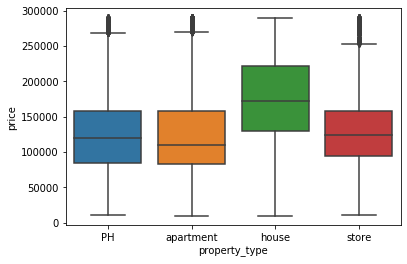

In [52]:
sns.boxplot('property_type','price', data=df)


In [54]:
print(" Score Train Lineal: %.2f\n" % regresionLineal_model.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % model_ridge.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  model_lasso.score(X_train, y_train))

# Calculamos el RMSE

y_pred_tr_lm = regresionLineal_model.predict(X_train)
y_pred_tr_ridge = model_ridge.predict(X_train)
y_pred_tr_lasso =model_lasso.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(metrics.mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso))


 Score Train Lineal: 0.24
 Score Train Ridge : 0.24
 Score Train Lasso : 0.22

 Train RMSE lineal   : 3016.60 
 Train RMSE Ridge    : 3016.74 
 Train RMSE Lasso    : 3043.49 

